## 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

In [2]:
def tanh(x):
    
    return np.tanh(x)

In [3]:
def weight_init(mean,std):
    
    return np.random.normal(mean, std,(256,256))

In [4]:
def forward_net(x,W):
    a1 = W.dot(x)
    h1 = tanh(a1)
    
    a2 = W.dot(h1)
    h2 = tanh(a2)
    
    a3 = W.dot(h2)
    h3 = tanh(a3)
    
    a4 = W.dot(h3)
    h4 = tanh(a4)
    
    a5 = W.dot(h4)
    h5 = tanh(a5)
    
    a6 = W.dot(h5)
    h6 = tanh(a6)
    
    a7 = W.dot(h6)
    h7 = tanh(a7)
    
    a8 = W.dot(h7)
    h8 = tanh(a8)
    
    a9 = W.dot(h8)
    h9 = tanh(a9)
    
    a10 = W.dot(h9)
    h10 = tanh(a10)
    
    return h1, h2, h3, h4, h5, h6, h7, h8, h9, h10

## 2(a) mean = 0, std = 0.01

In [5]:
x = np.random.normal(0,1,(256,1000))
x.shape

(256, 1000)

In [6]:
W = weight_init(0,0.01)
W.shape

(256, 256)

In [7]:
h_output = forward_net(x,W)

In [8]:
h_mean = []
h_std = []
for i in range(10):
    h_mean.append(np.mean(h_output[i]))
    h_std.append(np.std(h_output[i]))

### Plot of mean and std vs. layer index

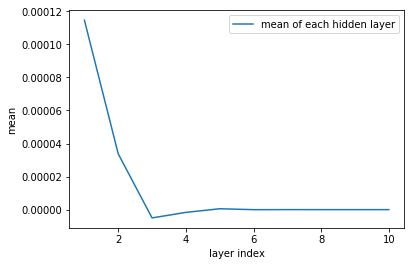

In [9]:
l = np.linspace(1,10,10)
plt.plot(l,h_mean,label='mean of each hidden layer')
plt.xlabel('layer index')
plt.ylabel('mean')
plt.legend()

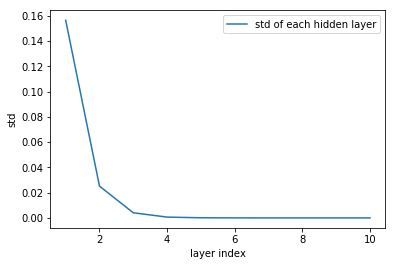

In [10]:
plt.plot(l,h_std,label='std of each hidden layer')
plt.xlabel('layer index')
plt.ylabel('std')
plt.legend()

### histogram of layer 2,4,6,8,10

In [11]:
_,h2,_,h4,_,h6,_,h8,_,h10 = h_output

In [12]:
h2 = h2.flatten()
h4 = h4.flatten()
h6 = h6.flatten()
h8 = h8.flatten()
h10 = h10.flatten()

#### Histogram of layer 2

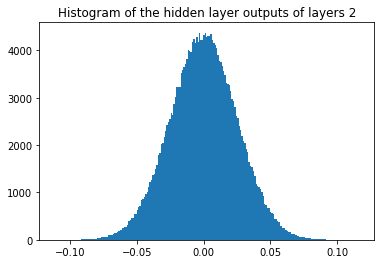

In [13]:
plt.hist(h2, bins='auto') 
plt.title("Histogram of the hidden layer outputs of layers 2")
plt.show()

#### Histogram of layer 4

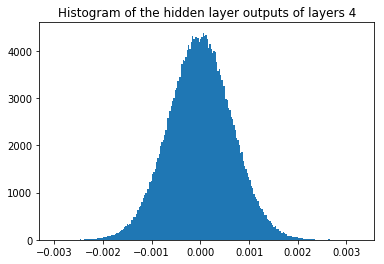

In [14]:
plt.hist(h4, bins='auto') 
plt.title("Histogram of the hidden layer outputs of layers 4")
plt.show()

#### Histogram of layer 6

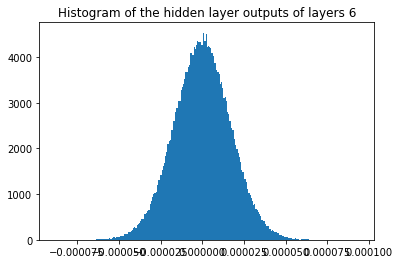

In [15]:
plt.hist(h6, bins='auto')  
plt.title("Histogram of the hidden layer outputs of layers 6")
plt.show()

#### Histogram of layer 8

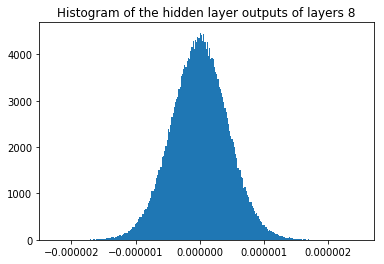

In [16]:
plt.hist(h8,bins='auto')  
plt.title("Histogram of the hidden layer outputs of layers 8")
plt.show()

#### Histogram of layer 10

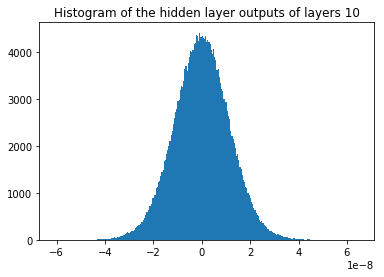

In [17]:
plt.hist(h10, bins='auto')  
plt.title("Histogram of the hidden layer outputs of layers 10")
plt.show()

### Discussion

- From the plot of both mean and std of hidden layers, it decreases a lot at the first 2-4 layers, then approaching to zero, which means when the network gets deeper, the output is approaching to 0. 
- However, the std is getting much smaller in each layer, which means it densely distributes at mean = 0.
- From the historgram of hidden output from each layer, we can see that they are mostly normal distribution with mean = 0, however, std are getting much smaller when layers are deeper. --> It will potentially lead to gradient vanishing problem.

## 2(b) mean = 0, std = 1

In [18]:
W = weight_init(0,1)
W.shape

(256, 256)

In [19]:
h_output = forward_net(x,W)

In [20]:
h_mean = []
h_std = []
for i in range(10):
    h_mean.append(np.mean(h_output[i]))
    h_std.append(np.std(h_output[i]))

### Plot of mean and std vs. layer index

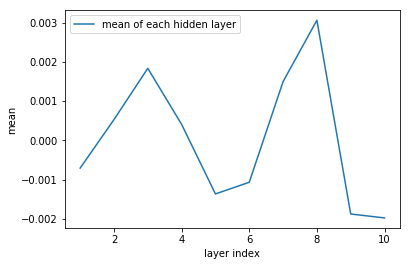

In [21]:
l = np.linspace(1,10,10)
plt.plot(l,h_mean,label='mean of each hidden layer')
plt.xlabel('layer index')
plt.ylabel('mean')
plt.legend()

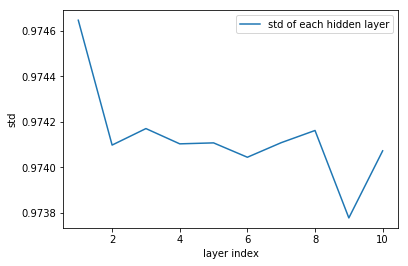

In [22]:
plt.plot(l,h_std,label='std of each hidden layer')
plt.xlabel('layer index')
plt.ylabel('std')
plt.legend()

### histogram of layer 2,4,6,8,10

In [23]:
_,h2,_,h4,_,h6,_,h8,_,h10 = h_output
h2 = h2.flatten()
h4 = h4.flatten()
h6 = h6.flatten()
h8 = h8.flatten()
h10 = h10.flatten()

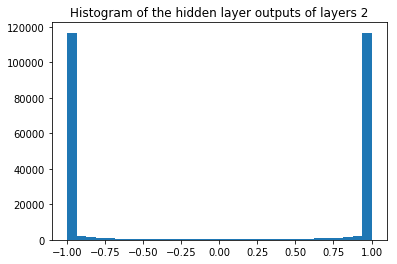

In [24]:
plt.hist(h2,bins='auto')  
plt.title("Histogram of the hidden layer outputs of layers 2")
plt.show()

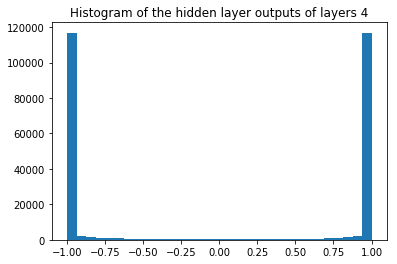

In [25]:
plt.hist(h4, bins='auto') 
plt.title("Histogram of the hidden layer outputs of layers 4")
plt.show()

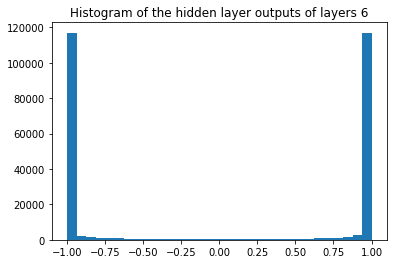

In [26]:
plt.hist(h6, bins='auto') 
plt.title("Histogram of the hidden layer outputs of layers 6")
plt.show()

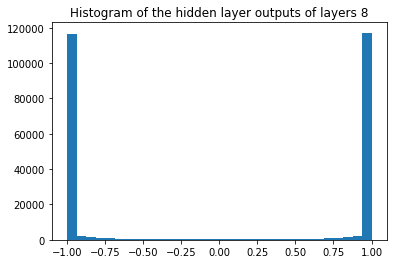

In [27]:
plt.hist(h8, bins='auto') 
plt.title("Histogram of the hidden layer outputs of layers 8")
plt.show()

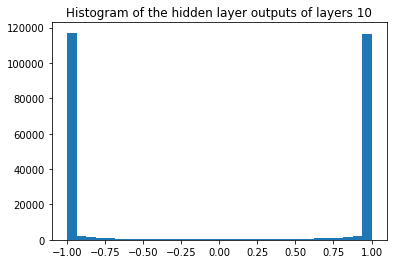

In [28]:
plt.hist(h10, bins='auto') 
plt.title("Histogram of the hidden layer outputs of layers 10")
plt.show()

### Comparison with 2(a)

- Initializing with std = 1 leads to a quite different result:
1. the mean of each hidden layer is fluctuating rather than decreasing, the std remains almost the same around 0.97 rather than decreasing.
2. From histograms, it's no longer a normal distribution. Though it still has a mean around 0, the majority of data distributes at -1 or 1 instead of 0. Even when the layers are deeper, the std is always around 1 and distribution is not a big difference. --> It might lead to gradient explosion.

## 2(c) Xavier initialization

In [29]:
std = np.sqrt(2/(256+256))

In [30]:
W = weight_init(0,std)

In [31]:
h_output = forward_net(x,W)
h_mean = []
h_std = []
for i in range(10):
    h_mean.append(np.mean(h_output[i]))
    h_std.append(np.std(h_output[i]))

### Plot of mean and std vs. layers

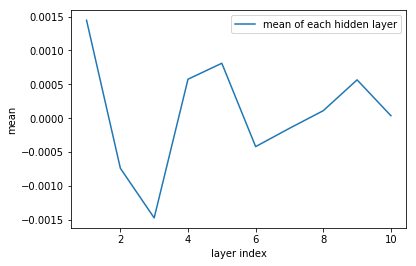

In [32]:
l = np.linspace(1,10,10)
plt.plot(l,h_mean,label='mean of each hidden layer')
plt.xlabel('layer index')
plt.ylabel('mean')
plt.legend()

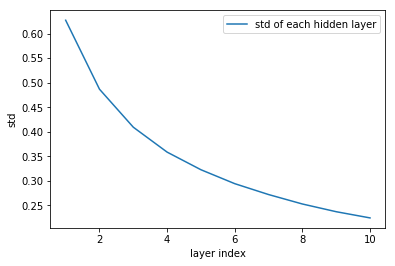

In [33]:
plt.plot(l,h_std,label='std of each hidden layer')
plt.xlabel('layer index')
plt.ylabel('std')
plt.legend()

### Histograms of layer 2,4,6,8,10

In [34]:
_,h2,_,h4,_,h6,_,h8,_,h10 = h_output
h2 = h2.flatten()
h4 = h4.flatten()
h6 = h6.flatten()
h8 = h8.flatten()
h10 = h10.flatten()

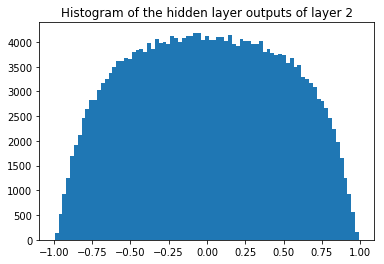

In [35]:
plt.hist(h2, bins='auto')  
plt.title("Histogram of the hidden layer outputs of layer 2")
plt.show()

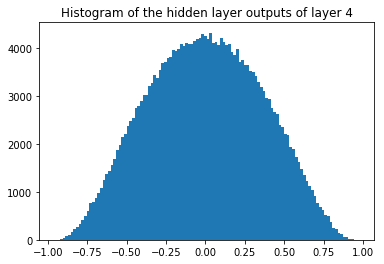

In [36]:
plt.hist(h4, bins='auto')  
plt.title("Histogram of the hidden layer outputs of layer 4")
plt.show()

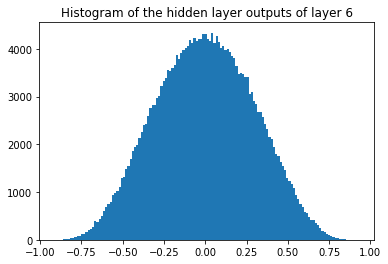

In [37]:
plt.hist(h6, bins='auto')  
plt.title("Histogram of the hidden layer outputs of layer 6")
plt.show()

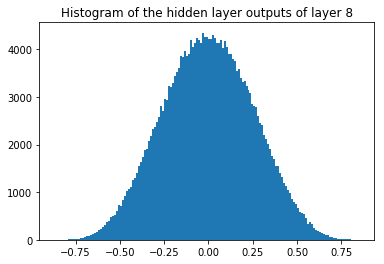

In [38]:
plt.hist(h8, bins='auto')  
plt.title("Histogram of the hidden layer outputs of layer 8")
plt.show()

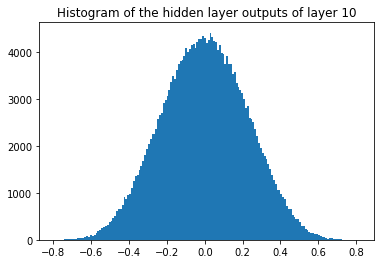

In [39]:
plt.hist(h10, bins='auto')  
plt.title("Histogram of the hidden layer outputs of layer 10")
plt.show()

### Comparison

- We can see that the mean of each layer fluctuating around 0, and std is smoothly decreasing with deeper layer.
- From the histograms, we can see that it is very close to a normal distribution with mean = 0, but the std is decreasing slightly each deeper layer. It's not like 2(a) with a very dense distribution around 0 or 2(b) with major distribution around 1 and -1, it forms a very good and constant normal distribution each layer with mean = 0 and ranges in -1 to 1 with decreasing std.
- Xavier initialization sets the weights neither too much bigger that 1, nor too much less than 1. So, the gradients do not vanish or explode too quickly. They help avoid slow convergence, also ensuring that we do not keep oscillating off the minima. --> It's better than (a) and (b).

## 2(d) Using ReLU and Xavier

In [40]:
def relu(a):
    
    return a * (a>0)

In [69]:
def forward_net_relu(x,W):
    a1 = W.dot(x)
    h1 = relu(a1)
    
    a2 = W.dot(h1)
    h2 = relu(a2)
    
    a3 = W.dot(h2)
    h3 = relu(a3)
    
    a4 = W.dot(h3)
    h4 = relu(a4)
    
    a5 = W.dot(h4)
    h5 = relu(a5)
    
    a6 = W.dot(h5)
    h6 = relu(a6)
    
    a7 = W.dot(h6)
    h7 = relu(a7)
    
    a8 = W.dot(h7)
    h8 = relu(a8)
    
    a9 = W.dot(h8)
    h9 = relu(a9)
    
    a10 = W.dot(h9)
    h10 = relu(a10)
    
    return h1, h2, h3, h4, h5, h6, h7, h8, h9, h10

In [70]:
std = np.sqrt(2/(256+256))
W = weight_init(0,std)

In [71]:
h_output = forward_net_relu(x,W)

In [72]:
h_mean = []
h_std = []
for i in range(10):
    h_mean.append(np.mean(h_output[i]))
    h_std.append(np.std(h_output[i]))

### Plot of mean and std vs. layer index

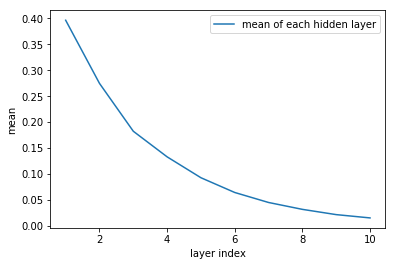

In [73]:
l = np.linspace(1,10,10)
plt.plot(l,h_mean,label='mean of each hidden layer')
plt.xlabel('layer index')
plt.ylabel('mean')
plt.legend()

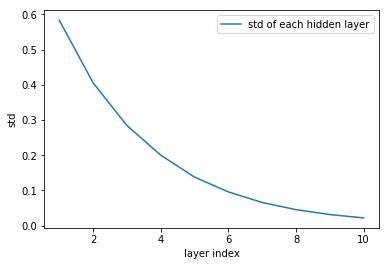

In [74]:
l = np.linspace(1,10,10)
plt.plot(l,h_std,label='std of each hidden layer')
plt.xlabel('layer index')
plt.ylabel('std')
plt.legend()

### Histograms of layer 2, 4, 6, 8, 10

In [75]:
_,h2,_,h4,_,h6,_,h8,_,h10 = h_output
h2 = h2.flatten()
h4 = h4.flatten()
h6 = h6.flatten()
h8 = h8.flatten()
h10 = h10.flatten()

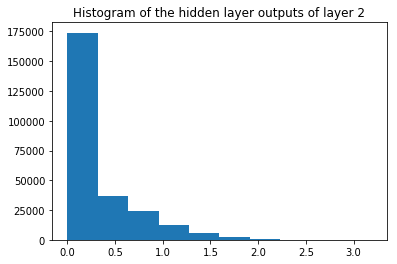

In [76]:
plt.hist(h2)  
plt.title("Histogram of the hidden layer outputs of layer 2")
plt.show()

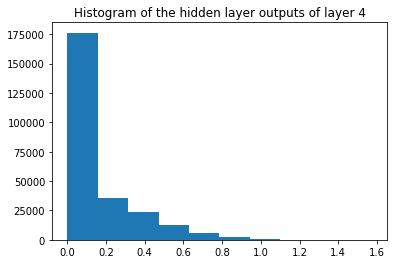

In [77]:
plt.hist(h4)  
plt.title("Histogram of the hidden layer outputs of layer 4")
plt.show()

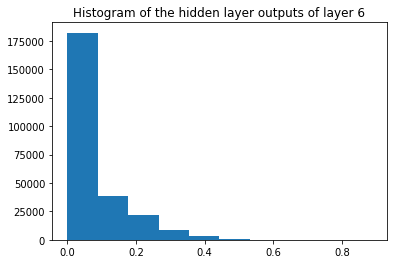

In [78]:
plt.hist(h6)  
plt.title("Histogram of the hidden layer outputs of layer 6")
plt.show()

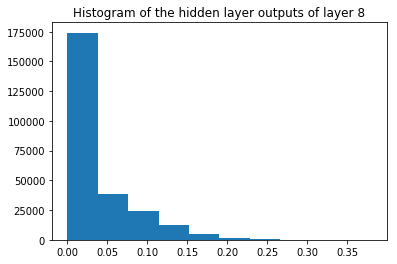

In [79]:
plt.hist(h8)  
plt.title("Histogram of the hidden layer outputs of layer 8")
plt.show()

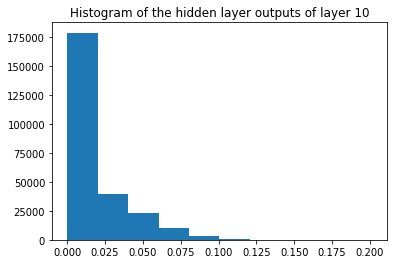

In [80]:
plt.hist(h10)  
plt.title("Histogram of the hidden layer outputs of layer 10")
plt.show()

### Comparison

- Using relu instead of tanh makes the output of hidden layer non-negative.
- From the plot of mean and std, we can see both mean and std are decreasing smoothly with the increasing of layers.
- From the histogram, we can see that the most of the data distributes at 0, however, when at shallow layer, there're data locating at 1 or more larger. The range of output for each layer is getting smaller. It's worse than 2(c).
- We can see that Xavier works better on tanh than relu, since Xavier assumes to be used on linear net. When performing on relu, the distribution of output is not constant layer from layer, which might lead to gradient oscillation.


## 2(e) Using ReLU and MSRA

In [81]:
std = np.sqrt(2/256)
W = weight_init(0,std)

In [82]:
h_output = forward_net_relu(x,W)
h_mean = []
h_std = []
for i in range(10):
    h_mean.append(np.mean(h_output[i]))
    h_std.append(np.std(h_output[i]))

### Plot of mean and std vs. layer index

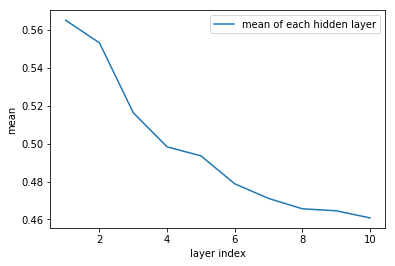

In [83]:
l = np.linspace(1,10,10)
plt.plot(l,h_mean,label='mean of each hidden layer')
plt.xlabel('layer index')
plt.ylabel('mean')
plt.legend()

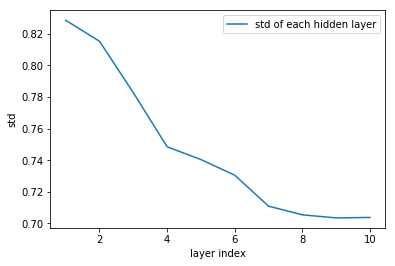

In [84]:
l = np.linspace(1,10,10)
plt.plot(l,h_std,label='std of each hidden layer')
plt.xlabel('layer index')
plt.ylabel('std')
plt.legend()

### Histograms

In [85]:
_,h2,_,h4,_,h6,_,h8,_,h10 = h_output
h2 = h2.flatten()
h4 = h4.flatten()
h6 = h6.flatten()
h8 = h8.flatten()
h10 = h10.flatten()

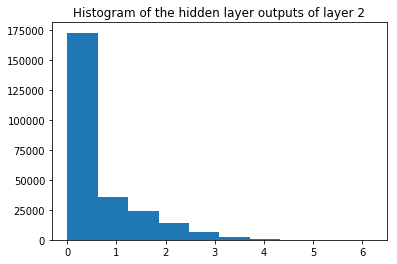

In [86]:
plt.hist(h2)  
plt.title("Histogram of the hidden layer outputs of layer 2")
plt.show()

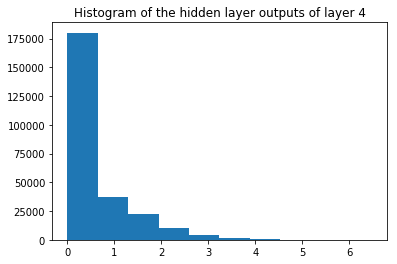

In [87]:
plt.hist(h4)  
plt.title("Histogram of the hidden layer outputs of layer 4")
plt.show()

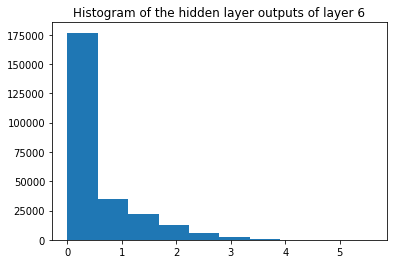

In [88]:
plt.hist(h6)  
plt.title("Histogram of the hidden layer outputs of layer 6")
plt.show()

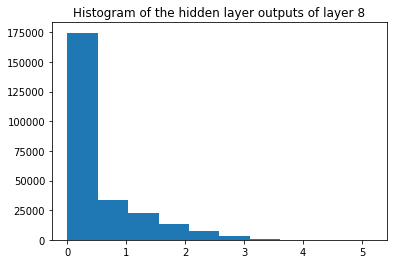

In [89]:
plt.hist(h8)  
plt.title("Histogram of the hidden layer outputs of layer 8")
plt.show()

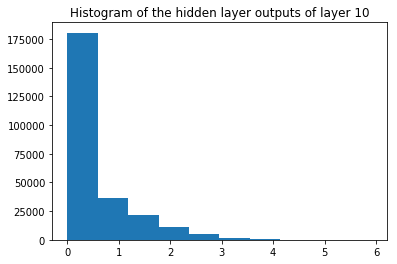

In [90]:
plt.hist(h10)  
plt.title("Histogram of the hidden layer outputs of layer 10")
plt.show()

### Comparison

- We can see from the plot that mean and std are both decreasing slightly. Thus, MSRA initialization is actually performing better than Xavier in maintaining a good std for each layer.
- From histograms, the distribution for each layer is quite constant, with mean around 0.5 and similar std, ranging from 0-5. Majority of data distributes at 0-0.5.
- This is because MSRA initialization is designed specially for network with ReLU activation function, therefore, it performs much better in maintaining good standard deviation for input and output data of each layer and maintaining a constant distribution for each layer.